# Model Experiments - Comprehensive Algorithm Evaluation

**Objective:** Evaluate 15 different algorithms using K-fold cross-validation and compare performance.

**Workflow:**
1. Load and prepare data
2. Evaluate 15 algorithms with 5-fold CV
3. Compare performance (MAPE metric)
4. Identify best algorithms and per-target strengths
5. Document results for hyperparameter tuning

**Algorithms Included:**
- Linear: Linear Regression, Ridge, Lasso, ElasticNet
- Tree-based: Decision Tree, Random Forest, ExtraTreesRegressor, GradientBoosting
- Boosting: XGBoost, LightGBM, CatBoost, AdaBoost
- Distance-based: KNeighborsRegressor
- SVM: SVR
- Neural: MLPRegressor

**Note:** Retrain and prediction steps are in a separate notebook (04_ensemble_and_predictions.ipynb)


## 1. Setup & Imports

In [1]:
%pip install pandas numpy scikit-learn xgboost lightgbm catboost -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import warnings
import time
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_percentage_error

# Linear Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Tree Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor

# Other Models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Advanced Boosting
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

print('✓ All libraries imported successfully')

✓ All libraries imported successfully


## 2. Load Data

In [3]:
# Load training and test datasets
train_path = r'C:\Users\tm0792.STUDENTS.010\OneDrive - UNT System\Competitions\Shell ai Hackathon\shell_ai_hack\data\train.csv'  
test_path = r'C:\Users\tm0792.STUDENTS.010\OneDrive - UNT System\Competitions\Shell ai Hackathon\shell_ai_hack\data\test.csv'  

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print('✓ Data loaded successfully')
print(f'  Training set: {train_df.shape}')
print(f'  Test set: {test_df.shape}')

✓ Data loaded successfully
  Training set: (2000, 65)
  Test set: (500, 56)


## 3. Feature Preparation

In [4]:
# Identify feature and target columns
blend_cols = [col for col in train_df.columns if 'fraction' in col]
component_prop_cols = [col for col in train_df.columns if 'Component' in col and 'Property' in col]
target_cols = [col for col in train_df.columns if 'BlendProperty' in col]

features_cols = blend_cols + component_prop_cols

# Prepare training data
X_train = train_df[features_cols].values
y_train = train_df[target_cols].values

print('✓ Features and targets prepared')
print(f'  Features: {X_train.shape}')
print(f'  Targets: {y_train.shape}')
print(f'\n  Feature columns ({len(features_cols)}):' )
print(f'    - Blend fractions: {len(blend_cols)}')
print(f'    - Component properties: {len(component_prop_cols)}')
print(f'\n  Target columns ({len(target_cols)}): {target_cols}')

✓ Features and targets prepared
  Features: (2000, 55)
  Targets: (2000, 10)

  Feature columns (55):
    - Blend fractions: 5
    - Component properties: 50

  Target columns (10): ['BlendProperty1', 'BlendProperty2', 'BlendProperty3', 'BlendProperty4', 'BlendProperty5', 'BlendProperty6', 'BlendProperty7', 'BlendProperty8', 'BlendProperty9', 'BlendProperty10']


## 4. K-Fold Setup

In [5]:
# Set up K-Fold Cross-Validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

print(f'✓ K-Fold Setup Complete')
print(f'  Number of folds: {k_folds}')
print(f'  Shuffle: True')
print(f'  Random state: 42')
print(f'  Scoring metric: MAPE (Mean Absolute Percentage Error)')

✓ K-Fold Setup Complete
  Number of folds: 5
  Shuffle: True
  Random state: 42
  Scoring metric: MAPE (Mean Absolute Percentage Error)


## 5. Define All 15 Algorithms

In [6]:
# Define all algorithms with carefully chosen hyperparameters
algorithms = {
    # Linear Models (4)
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    
    # Tree Models (5)
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=15),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    
    # Advanced Boosting (3)
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, verbose=-1),
    'CatBoost': CatBoostRegressor(iterations=100, learning_rate=0.1, depth=5, random_state=42, verbose=False),
    
    # Other Models (3)
    'SVR': SVR(kernel='rbf', C=100),
    'KNeighbors': KNeighborsRegressor(n_neighbors=5, n_jobs=-1),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42, early_stopping=True)
}

print(f'✓ {len(algorithms)} algorithms defined with tuned hyperparameters:')
print(f'\nLinear Models (4):')
for name in ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet']:
    print(f'  - {name}')
print(f'\nTree Models (5):')
for name in ['Decision Tree', 'Random Forest', 'ExtraTrees', 'Gradient Boosting', 'AdaBoost']:
    print(f'  - {name}')
print(f'\nAdvanced Boosting (3):')
for name in ['XGBoost', 'LightGBM', 'CatBoost']:
    print(f'  - {name}')
print(f'\nOther Models (3):')
for name in ['SVR', 'KNeighbors', 'Neural Network']:
    print(f'  - {name}')

✓ 15 algorithms defined with tuned hyperparameters:

Linear Models (4):
  - Linear Regression
  - Ridge
  - Lasso
  - ElasticNet

Tree Models (5):
  - Decision Tree
  - Random Forest
  - ExtraTrees
  - Gradient Boosting
  - AdaBoost

Advanced Boosting (3):
  - XGBoost
  - LightGBM
  - CatBoost

Other Models (3):
  - SVR
  - KNeighbors
  - Neural Network


## 6. Evaluate All Algorithms with K-Fold

In [7]:
print('\n' + '='*80)
print('EVALUATING ALL 15 ALGORITHMS WITH 5-FOLD CROSS-VALIDATION')
print('='*80)

# Store results for each target
results_by_target = {target: {} for target in target_cols}
overall_results = {}

# Evaluate each algorithm
for algo_name, algo in algorithms.items():
    print(f'\nEvaluating: {algo_name}...')
    start_time = time.time()
    
    algo_mapes = []
    
    # Evaluate for each target
    for target_idx, target_name in enumerate(target_cols):
        # Get target column
        y_target = y_train[:, target_idx]
        
        # Calculate CV scores
        cv_scores = cross_val_score(
            algo, 
            X_train, 
            y_target,
            cv=kf,
            scoring='neg_mean_absolute_percentage_error',
            n_jobs=-1
        )
        
        # Convert to positive MAPE
        mapes = -cv_scores
        mean_mape = mapes.mean()
        std_mape = mapes.std()
        
        results_by_target[target_name][algo_name] = {
            'mean': mean_mape,
            'std': std_mape,
            'scores': mapes
        }
        
        algo_mapes.append(mean_mape)
    
    # Overall average across all targets
    overall_mape = np.mean(algo_mapes)
    overall_std = np.std(algo_mapes)
    
    overall_results[algo_name] = {
        'mean': overall_mape,
        'std': overall_std,
        'per_target': algo_mapes
    }
    
    elapsed = time.time() - start_time
    print(f'  ✓ {algo_name}: MAPE = {overall_mape:.4f} ± {overall_std:.4f} (Time: {elapsed:.2f}s)')


EVALUATING ALL 15 ALGORITHMS WITH 5-FOLD CROSS-VALIDATION

Evaluating: Linear Regression...
  ✓ Linear Regression: MAPE = 2.3552 ± 1.1036 (Time: 7.35s)

Evaluating: Ridge...
  ✓ Ridge: MAPE = 2.3103 ± 1.1374 (Time: 0.12s)

Evaluating: Lasso...
  ✓ Lasso: MAPE = 2.1491 ± 0.5948 (Time: 0.12s)

Evaluating: ElasticNet...
  ✓ ElasticNet: MAPE = 2.3665 ± 0.9190 (Time: 0.14s)

Evaluating: Decision Tree...
  ✓ Decision Tree: MAPE = 3.6222 ± 2.1714 (Time: 0.99s)

Evaluating: Random Forest...
  ✓ Random Forest: MAPE = 1.9521 ± 1.1144 (Time: 29.06s)

Evaluating: ExtraTrees...
  ✓ ExtraTrees: MAPE = 2.4424 ± 2.8086 (Time: 11.30s)

Evaluating: Gradient Boosting...
  ✓ Gradient Boosting: MAPE = 1.1872 ± 0.4926 (Time: 39.84s)

Evaluating: AdaBoost...
  ✓ AdaBoost: MAPE = 3.4029 ± 3.3087 (Time: 17.65s)

Evaluating: XGBoost...
  ✓ XGBoost: MAPE = 1.3327 ± 0.8465 (Time: 8.34s)

Evaluating: LightGBM...
  ✓ LightGBM: MAPE = 1.3136 ± 0.7015 (Time: 10.77s)

Evaluating: CatBoost...
  ✓ CatBoost: MAPE = 1.26

## 7. Compare Results - Overall Performance

In [8]:
print('\n' + '='*80)
print('ALGORITHM COMPARISON RESULTS - ALL 15')
print('='*80)

# Sort algorithms by overall MAPE (best first)
sorted_results = sorted(overall_results.items(), key=lambda x: x[1]['mean'])

print(f'\n{"Rank":<5} {"Algorithm":<25} {"MAPE":<12} {"Std Dev":<12} {"vs Baseline":<15}')
print('-'*80)

baseline = 2.72
for rank, (algo_name, metrics) in enumerate(sorted_results, 1):
    improvement = baseline - metrics['mean']
    improvement_pct = (improvement / baseline) * 100
    status = f'{improvement:+.4f} ({improvement_pct:+.2f}%)'
    marker = '✓ BEST' if rank == 1 else ''
    print(f'{rank:<5} {algo_name:<25} {metrics["mean"]:<12.4f} {metrics["std"]:<12.4f} {status:<15} {marker}')


ALGORITHM COMPARISON RESULTS - ALL 15

Rank  Algorithm                 MAPE         Std Dev      vs Baseline    
--------------------------------------------------------------------------------
1     Gradient Boosting         1.1872       0.4926       +1.5328 (+56.35%) ✓ BEST
2     CatBoost                  1.2604       0.7047       +1.4596 (+53.66%) 
3     LightGBM                  1.3136       0.7015       +1.4064 (+51.71%) 
4     XGBoost                   1.3327       0.8465       +1.3873 (+51.00%) 
5     Random Forest             1.9521       1.1144       +0.7679 (+28.23%) 
6     Lasso                     2.1491       0.5948       +0.5709 (+20.99%) 
7     Ridge                     2.3103       1.1374       +0.4097 (+15.06%) 
8     Linear Regression         2.3552       1.1036       +0.3648 (+13.41%) 
9     ElasticNet                2.3665       0.9190       +0.3535 (+13.00%) 
10    ExtraTrees                2.4424       2.8086       +0.2776 (+10.20%) 
11    AdaBoost               

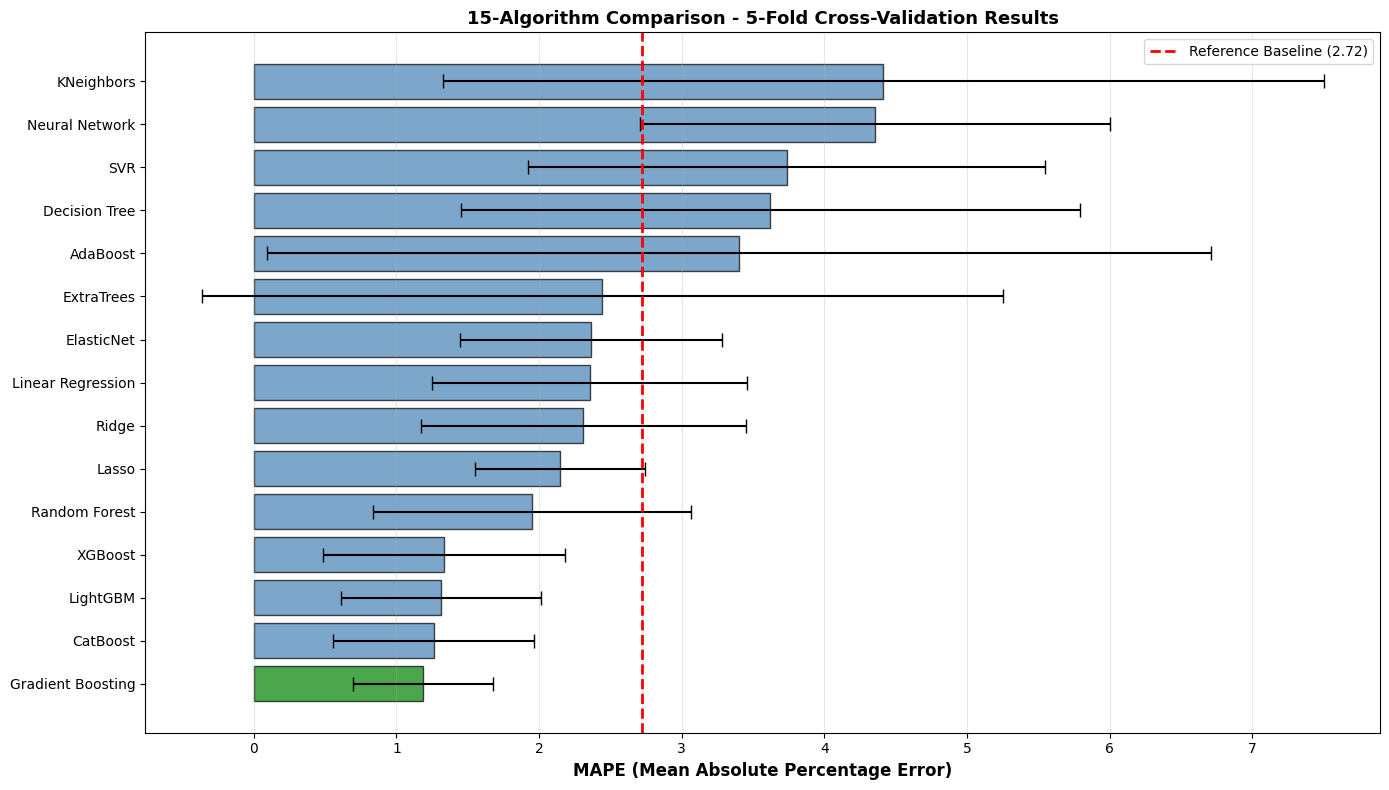

✓ Comparison visualization displayed


In [9]:
# Visualize comparison
fig, ax = plt.subplots(figsize=(14, 8))

algo_names = [item[0] for item in sorted_results]
mapes = [item[1]['mean'] for item in sorted_results]
stds = [item[1]['std'] for item in sorted_results]

colors = ['green' if i == 0 else 'steelblue' for i in range(len(algo_names))]

ax.barh(algo_names, mapes, xerr=stds, capsize=5, color=colors, alpha=0.7, edgecolor='black')
ax.set_xlabel('MAPE (Mean Absolute Percentage Error)', fontsize=12, fontweight='bold')
ax.set_title('15-Algorithm Comparison - 5-Fold Cross-Validation Results', fontsize=13, fontweight='bold')
ax.axvline(x=2.72, color='red', linestyle='--', linewidth=2, label='Reference Baseline (2.72)')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print('✓ Comparison visualization displayed')

## 8. Detailed Per-Target Performance

In [10]:
print('\n' + '='*80)
print('PER-TARGET PERFORMANCE')
print('='*80)

# Create results DataFrame
results_df = pd.DataFrame()

for algo_name in algorithms.keys():
    row = {'Algorithm': algo_name}
    for target_name in target_cols:
        mean_mape = results_by_target[target_name][algo_name]['mean']
        row[target_name] = mean_mape
    results_df = pd.concat([results_df, pd.DataFrame([row])], ignore_index=True)

print('\n' + results_df.to_string(index=False))

print('\n' + '-'*80)
print('Best algorithm per target:')
for target_name in target_cols:
    best_algo = min(algorithms.keys(), 
                   key=lambda x: results_by_target[target_name][x]['mean'])
    best_mape = results_by_target[target_name][best_algo]['mean']
    print(f'  {target_name:15s}: {best_algo:25s} (MAPE: {best_mape:.4f})')


PER-TARGET PERFORMANCE

        Algorithm  BlendProperty1  BlendProperty2  BlendProperty3  BlendProperty4  BlendProperty5  BlendProperty6  BlendProperty7  BlendProperty8  BlendProperty9  BlendProperty10
Linear Regression        4.412834        1.897765        2.104372        1.671970        4.407143        1.568918        2.839522        1.631804        1.813235         1.203958
            Ridge        4.453886        1.818027        2.050201        1.420458        4.363472        1.553891        2.937291        1.679001        1.577099         1.250015
            Lasso        3.418721        1.917893        1.316596        1.791329        2.799361        2.049865        1.954751        2.183932        2.554456         1.504129
       ElasticNet        4.661442        2.104212        1.305813        2.091088        2.824075        2.187570        1.660467        2.383154        2.974954         1.472321
    Decision Tree        8.879190        3.059244        3.194727        3.31818

## 9. Algorithm Categories Comparison

In [11]:
print('\n' + '='*80)
print('PERFORMANCE BY ALGORITHM CATEGORY')
print('='*80)

categories = {
    'Linear Models': ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet'],
    'Tree Models': ['Decision Tree', 'Random Forest', 'ExtraTrees', 'Gradient Boosting', 'AdaBoost'],
    'Advanced Boosting': ['XGBoost', 'LightGBM', 'CatBoost'],
    'Other Models': ['SVR', 'KNeighbors', 'Neural Network']
}

for category, algos in categories.items():
    avg_mape = np.mean([overall_results[algo]['mean'] for algo in algos if algo in overall_results])
    best_algo = min(algos, key=lambda x: overall_results[x]['mean'])
    best_mape = overall_results[best_algo]['mean']
    
    print(f'\n{category}:')
    print(f'  Average MAPE: {avg_mape:.4f}')
    print(f'  Best in category: {best_algo} ({best_mape:.4f})')
    for algo in algos:
        if algo in overall_results:
            print(f'    - {algo:25s}: {overall_results[algo]["mean"]:.4f}')


PERFORMANCE BY ALGORITHM CATEGORY

Linear Models:
  Average MAPE: 2.2953
  Best in category: Lasso (2.1491)
    - Linear Regression        : 2.3552
    - Ridge                    : 2.3103
    - Lasso                    : 2.1491
    - ElasticNet               : 2.3665

Tree Models:
  Average MAPE: 2.5213
  Best in category: Gradient Boosting (1.1872)
    - Decision Tree            : 3.6222
    - Random Forest            : 1.9521
    - ExtraTrees               : 2.4424
    - Gradient Boosting        : 1.1872
    - AdaBoost                 : 3.4029

Advanced Boosting:
  Average MAPE: 1.3022
  Best in category: CatBoost (1.2604)
    - XGBoost                  : 1.3327
    - LightGBM                 : 1.3136
    - CatBoost                 : 1.2604

Other Models:
  Average MAPE: 4.1692
  Best in category: SVR (3.7367)
    - SVR                      : 3.7367
    - KNeighbors               : 4.4139
    - Neural Network           : 4.3570
